# Version 0.6

Adding probability-based model.
Adjusting the plot style.
Adding the reference line.

# No strategy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

N = 100
iter_num = 500
bar_people_num = np.zeros(iter_num)
home_num = np.zeros(iter_num)
for i in range(iter_num):
    for j in range(N):
        rd = randint(0, 1)
        if(rd == 1):
            bar_people_num[i] += 1
        else:
            home_num[i] += 1

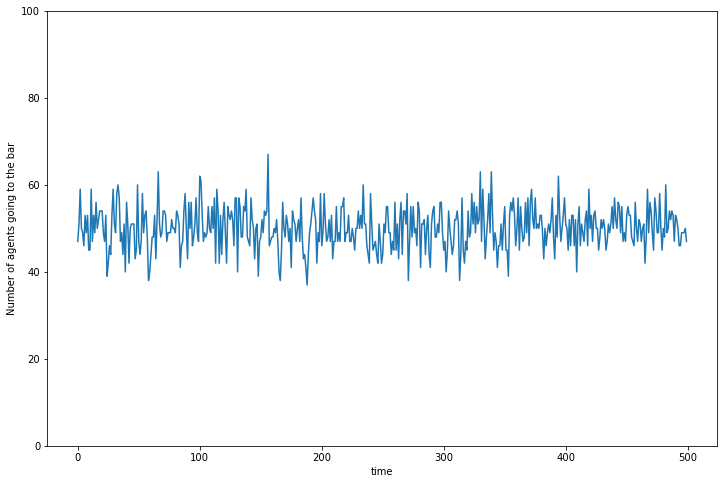

In [2]:
t_ax = [i for i in range(iter_num)]
plt.figure(figsize=(12, 8))
plt.plot(t_ax, bar_people_num)
plt.ylim([0, N])
plt.xlabel("time")
plt.ylabel("Number of agents going to the bar")
plt.show()

# With short-term memory

In [3]:
#number of agents
N=100
iter_num = 500
m=3
s=4

# num of strategies
s_list=[2,5,10,20]

# num of memory steps
m_list=[3,5,10,15]

In [4]:
"""
CHEN Xiaolong
2021.11.19
Class Encapsulate
El-Farol Bar problem
"""
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
from random import choice
from random import choices
class BarGame():
    def __init__(self, iter_num=500, N=100, m=3, s=4, cal_benefit=0):
        self.iter_num = iter_num
        self.N = N
        self.m = m
        self.s = s
        self.dim = 2**m
        self.cal_benefit = cal_benefit
        self.d_arr = np.random.randint(0, 2, (N, s, self.dim))
        self.v_score = np.zeros((N, s))
        self.r_score = np.zeros(N)
        self.num_bar = []
        self.r_score_history = [[] for i in range(N)]
    
    def runGame(self):
        mu = randint(0, self.dim-1)
        N = self.N
        for i in range(self.iter_num):
            num_going = 0
            decision = np.zeros(N)
            for ag in range(N):
                # find the best strategy 
                maxv = self.v_score[ag][0]
                choice_s = []
                for st in range(self.s):
                    if self.v_score[ag][st] > maxv:
                        maxv = self.v_score[ag][st]
                        choice_s.append(st)
                    elif self.v_score[ag][st] == maxv:
                        choice_s.append(st)
                cur_choice = choice(choice_s)
                decision[ag] = self.d_arr[ag][cur_choice][mu]
                if decision[ag] == 1:
                    num_going += 1
            self.num_bar.append(num_going)
            
            if self.cal_benefit == 0:
                benefit = self.calBenefit_0(num_going, N)
                self.update_score_non_neg(mu, benefit, decision)
            elif self.cal_benefit == 1:
                benefit = self.calBenefit_1(num_going, N)
                self.update_score_non_neg(mu, benefit, decision)
            elif self.cal_benefit == 2:
                benefit = self.calBenefit_2(num_going, N)
                self.update_score_neg(mu, benefit, decision)
            else:
                benefit = self.calBenefit_3(num_going, N)
                self.update_score_neg(mu, benefit, decision)
            w = 1 if benefit > 1 else 0
            mu = (mu*2+w)%self.dim

    def update_score_non_neg(self, mu, benefit, decision):
        for ag in range(self.N):
            for i in range(self.s):
                if self.d_arr[ag][i][mu] == 1: # if go to bar, v_score add by benefit
                    self.v_score[ag][i] += benefit #*(self.d_arr[ag][i][mu]) 
                elif self.d_arr[ag][i][mu] == 0: # if stay at home, v_score always add 1
                    self.v_score[ag][i] += 1
            if decision[ag] == 1:
                self.r_score[ag] += benefit #*(decision[ag])
            elif decision[ag] == 0:
                self.r_score[ag] += 1
            self.r_score_history[ag].append(self.r_score[ag])
    
    def update_score_neg(self, mu, benefit, decision):
        for ag in range(self.N):
            for i in range(self.s):
                self.v_score[ag][i] += benefit*(2*self.d_arr[ag][i][mu] - 1)
            self.r_score[ag] += benefit*(2*decision[ag]-1)
            self.r_score_history[ag].append(self.r_score[ag])

    def calBenefit_0(self, num_going, N):
        if num_going - int(N*0.6) > 0:  # if crowded, benefit < 1
            return 1 - (num_going - int(N*0.6))/N
        else:  # if not crowded, benefit > 1
            return 1 + (int(N*0.6) - num_going)/N
    
    def calBenefit_1(self, num_going, N):
        if num_going - int(N*0.6) > 0: # if crowded, benefit = 0
            return 0
        else:  # if not crowded, benefit = 2
            return 2
    
    def calBenefit_2(self, num_going, N):
        return (int(N*0.6) - num_going)/N

    def calBenefit_3(self, num_going, N):
        return -1 if num_going > int(N*0.6) else 1

    def getRealScore(self):
        return self.r_score
    
    def getScoreHistory(self):
        return self.r_score_history
    
    def getNumberofPeopleInBar(self):
        return np.array(self.num_bar)

## Assumption 1: Only winners and losers
### More crowded, more uncomfortable
#### Memory steps

In [5]:
num_bar_1_1_m = []
var_list_1_1_m = []
for m in m_list:
    cur_game = BarGame(N=100, iter_num=500, m=m, s=3, cal_benefit=2)
    cur_game.runGame()
    tmp_num = cur_game.getNumberofPeopleInBar()
    num_bar_1_1_m.append(tmp_num)
    var_list_1_1_m.append(np.var(tmp_num))

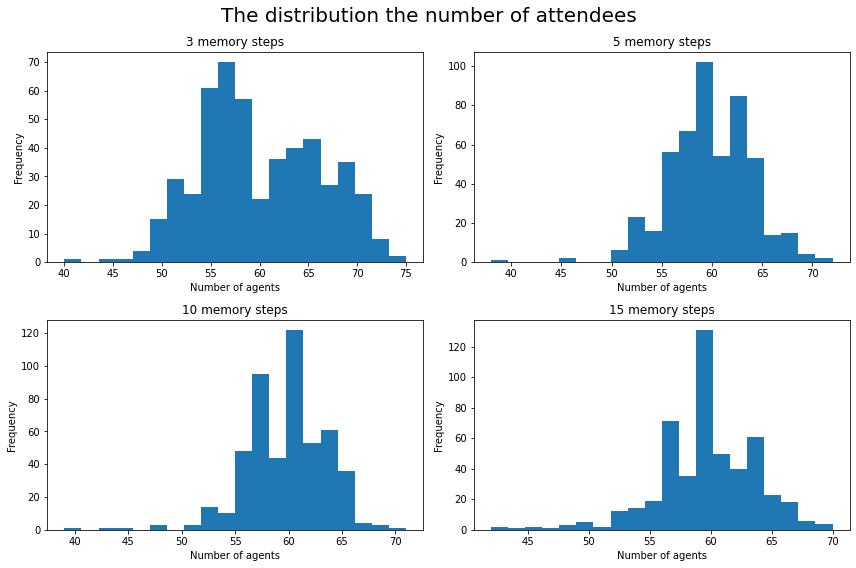

In [36]:
plt.figure(figsize=(12,8))
plt.suptitle("The distribution the number of attendees", size=20)
for i in range(len(m_list)):
    plt.subplot(221+i)
    plt.hist(num_bar_1_1_m[i], bins=20)
    plt.title(f"{m_list[i]} memory steps")
    plt.xlabel("Number of agents")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

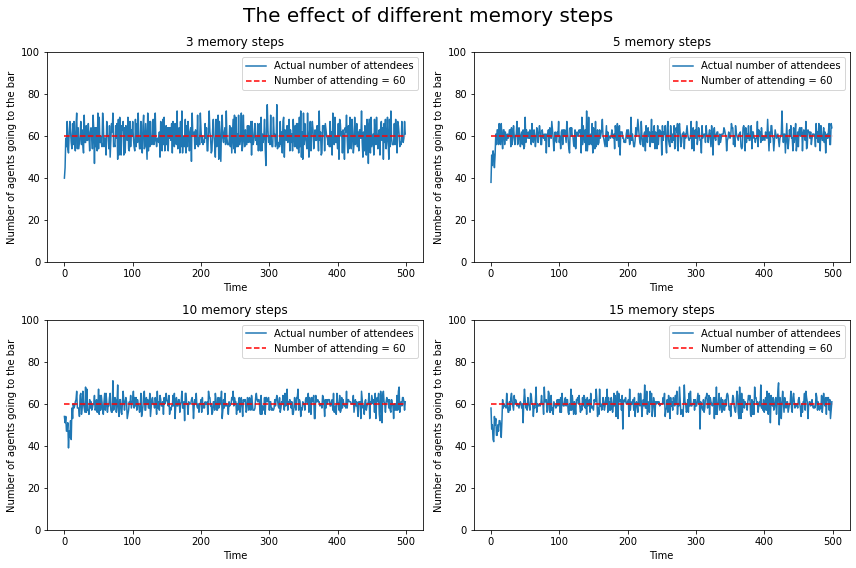

In [37]:
plt.figure(figsize=(12,8))
plt.suptitle("The effect of different memory steps", size=20)
for (i,s) in zip(range(len(m_list)),m_list):
    plt.subplot(221+i)
    plt.plot(num_bar_1_1_m[i], label="Actual number of attendees")
    plt.title(f"{m_list[i]} memory steps")
    plt.plot([0, iter_num], [60, 60], "r--", label="Number of attending = 60")
    plt.legend()
    plt.ylim([0, N])
    plt.xlabel("Time")
    plt.ylabel("Number of agents going to the bar")
plt.tight_layout()
plt.show()

#### Number of strategies

In [8]:
num_bar_1_1_s = []
for s in s_list:
    cur_game = BarGame(N=100, iter_num=500, s=s, cal_benefit=2)
    cur_game.runGame()
    num_bar_1_1_s.append(cur_game.getNumberofPeopleInBar())

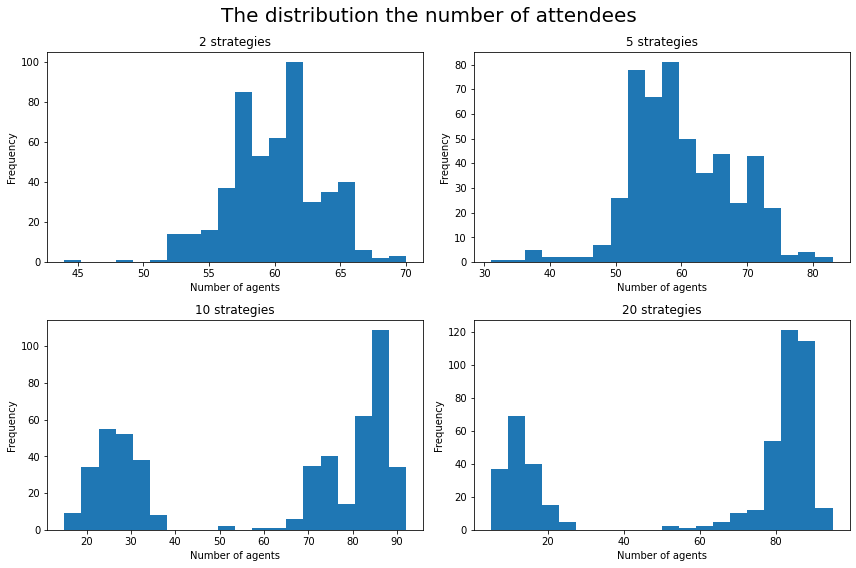

In [9]:
plt.figure(figsize=(12,8))
plt.suptitle("The distribution the number of attendees", size=20)
for i in range(len(s_list)):
    plt.subplot(221+i)
    plt.hist(num_bar_1_1_s[i], bins=20)
    plt.title(f"{s_list[i]} strategies")
    plt.xlabel("Number of agents")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

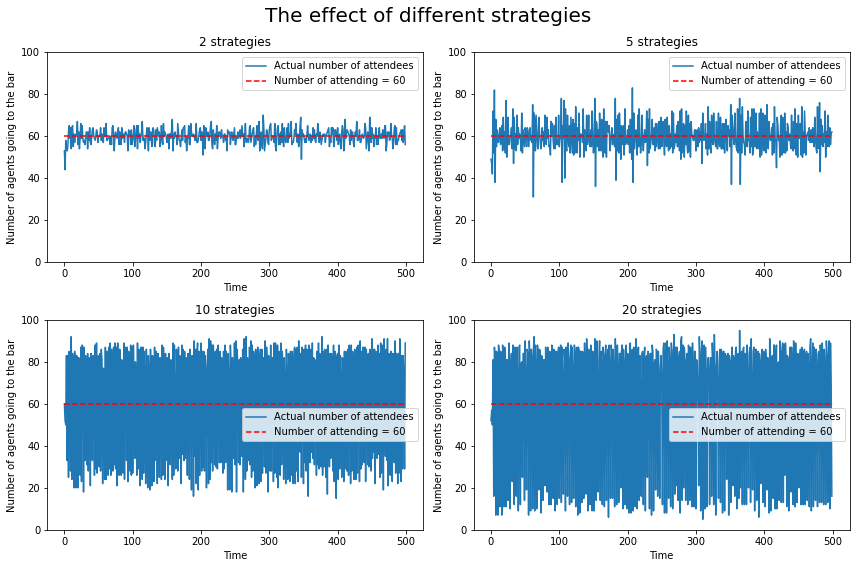

In [39]:
# plot number of people in bar vs time
plt.figure(figsize=(12,8))
plt.suptitle("The effect of different strategies", size=20)
for (i,s) in zip(range(len(s_list)),s_list):
    plt.subplot(221+i)
    plt.plot(num_bar_1_1_s[i], label="Actual number of attendees")
    plt.title(f"{s_list[i]} strategies")
    plt.plot([0, iter_num], [60, 60], "r--", label="Number of attending = 60")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Number of agents going to the bar")
    plt.ylim([0, 100])
plt.tight_layout()
plt.show()

## Once exceed 60, uncomfortable

In [11]:
num_bar_1_2_m = []
var_list_1_2_m = []
for m in m_list:
    cur_game = BarGame(N=100, iter_num=500, m=m, s=4, cal_benefit=3)
    cur_game.runGame()
    tmp_num = cur_game.getNumberofPeopleInBar()
    num_bar_1_2_m.append(tmp_num)
    var_list_1_2_m.append(np.var(tmp_num))

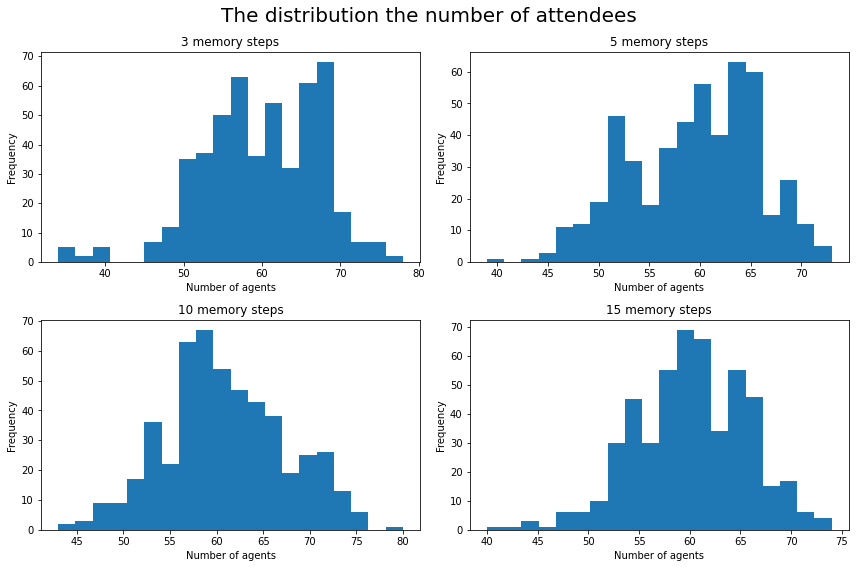

In [12]:
plt.figure(figsize=(12,8))
plt.suptitle("The distribution the number of attendees", size=20)
for i in range(len(m_list)):
    plt.subplot(221+i)
    plt.hist(num_bar_1_2_m[i], bins=20)
    plt.title(f"{m_list[i]} memory steps")
    plt.xlabel("Number of agents")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

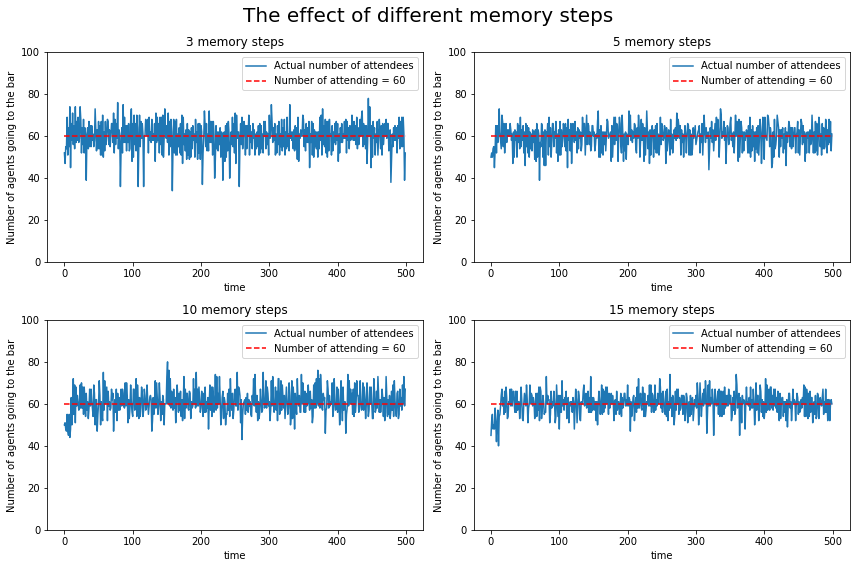

In [13]:
plt.figure(figsize=(12,8))
plt.suptitle("The effect of different memory steps", size=20)
for i in range(len(m_list)):
    plt.subplot(221+i)
    plt.plot(num_bar_1_2_m[i], label="Actual number of attendees")
    plt.title(f"{m_list[i]} memory steps")
    plt.plot([0, iter_num], [60, 60], "r--", label="Number of attending = 60")
    plt.legend()
    plt.ylim([0, N])
    plt.xlabel("time")
    plt.ylabel("Number of agents going to the bar")
plt.tight_layout()
plt.show()

### Number of strategies

In [14]:
num_bar_1_2_s = []
for s in s_list:
    cur_game = BarGame(N=100, iter_num=500, s=s, cal_benefit=3)
    cur_game.runGame()
    num_bar_1_2_s.append(cur_game.getNumberofPeopleInBar())

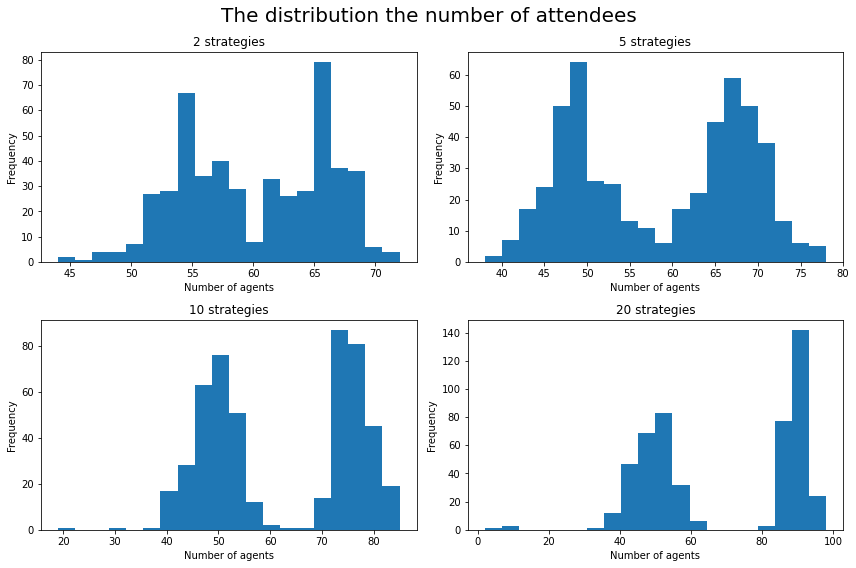

In [15]:
plt.figure(figsize=(12,8))
plt.suptitle("The distribution the number of attendees", size=20)
for i in range(len(s_list)):
    plt.subplot(221+i)
    plt.hist(num_bar_1_2_s[i], bins=20)
    plt.title(f"{s_list[i]} strategies")
    plt.xlabel("Number of agents")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

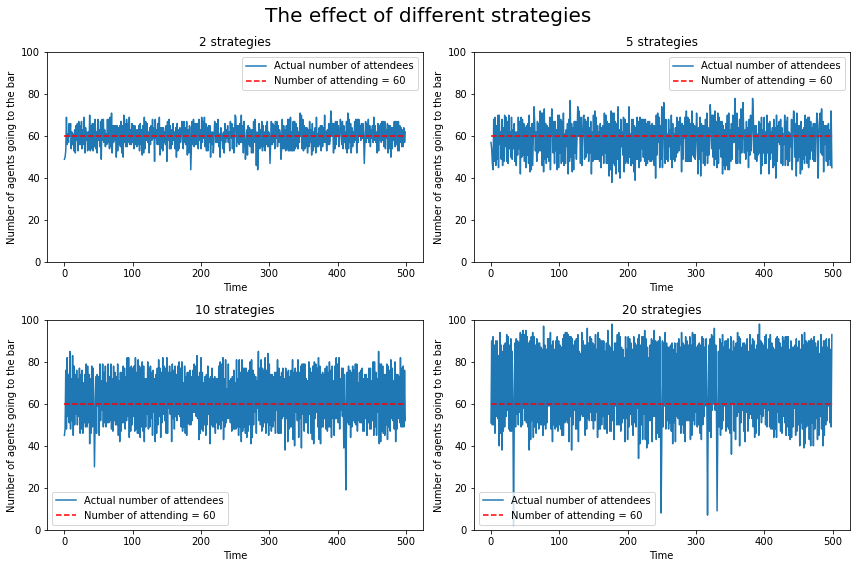

In [40]:
plt.figure(figsize=(12,8))
plt.suptitle("The effect of different strategies", size=20)
for i in range(len(s_list)):
    plt.subplot(221+i)
    plt.plot(num_bar_1_2_s[i], label="Actual number of attendees")
    plt.title(f"{s_list[i]} strategies")
    plt.plot([0, iter_num], [60, 60], "r--", label="Number of attending = 60")
    plt.legend()
    plt.ylim([0, 100])
    plt.xlabel("Time")
    plt.ylabel("Number of agents going to the bar")
plt.tight_layout()
plt.show()

# Assumption 2: Winners in bar> staying at home > losers in bar

## More crowded, more uncomfortable

### Effect on number of strategies

In [17]:
# simulations for 0
num_bar_01 = []
for s in s_list:
    cur_game = BarGame(s=s, cal_benefit=0)
    cur_game.runGame()
    num_bar = cur_game.getNumberofPeopleInBar()
    num_bar_01.append(num_bar)

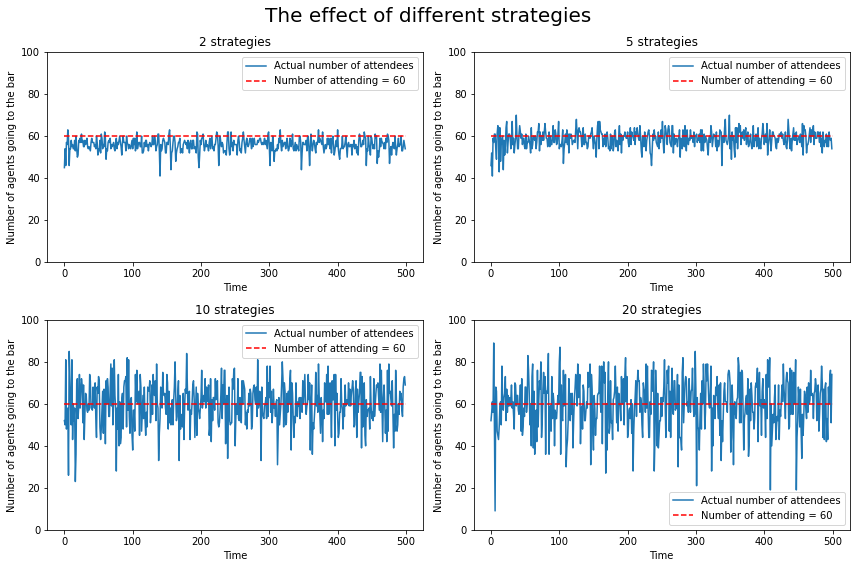

In [18]:
# plot number of people in bar vs time
plt.figure(figsize=(12,8))
plt.suptitle("The effect of different strategies", size=20)
for i in range(len(s_list)):
    plt.subplot(221+i)
    plt.plot(num_bar_01[i], label="Actual number of attendees")
    plt.title(f"{s_list[i]} strategies")
    plt.plot([0, iter_num], [60, 60], "r--", label="Number of attending = 60")
    plt.legend()
    plt.ylim([0, 100])
    plt.xlabel("Time")
    plt.ylabel("Number of agents going to the bar")
plt.tight_layout()
plt.show()

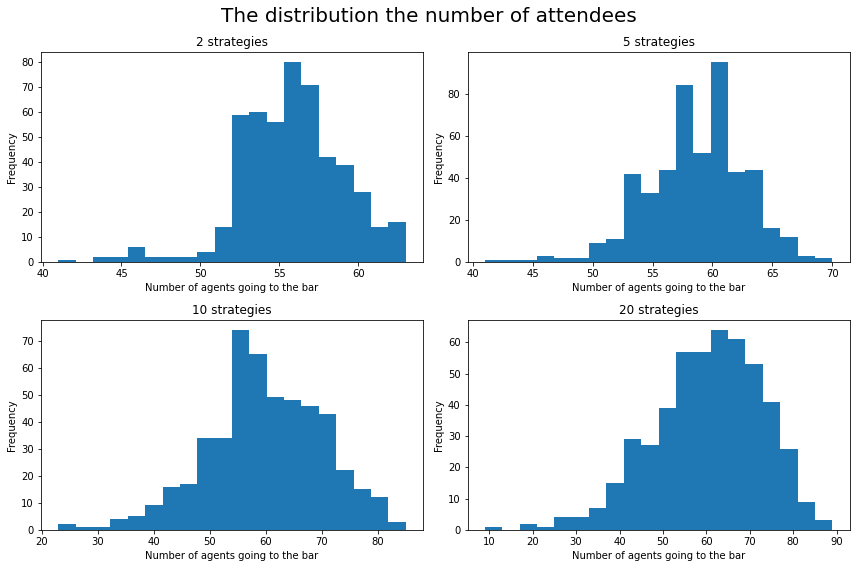

In [19]:
# plot number of people in bar density
plt.figure(figsize=(12,8))
plt.suptitle("The distribution the number of attendees", size=20)
for i in range(len(s_list)):
    plt.subplot(221+i)
    plt.hist(num_bar_01[i],bins=20)
    plt.title(f"{s_list[i]} strategies")
    plt.xlabel("Number of agents going to the bar")
    plt.ylabel("Frequency")
plt.tight_layout()

### Effect on number of memory steps

In [20]:
# simulations for 0
num_bar_02 = []
for m in m_list:
    cur_game = BarGame(s=4, m=m, cal_benefit=0)
    cur_game.runGame()
    num_bar = cur_game.getNumberofPeopleInBar()
    num_bar_02.append(num_bar)

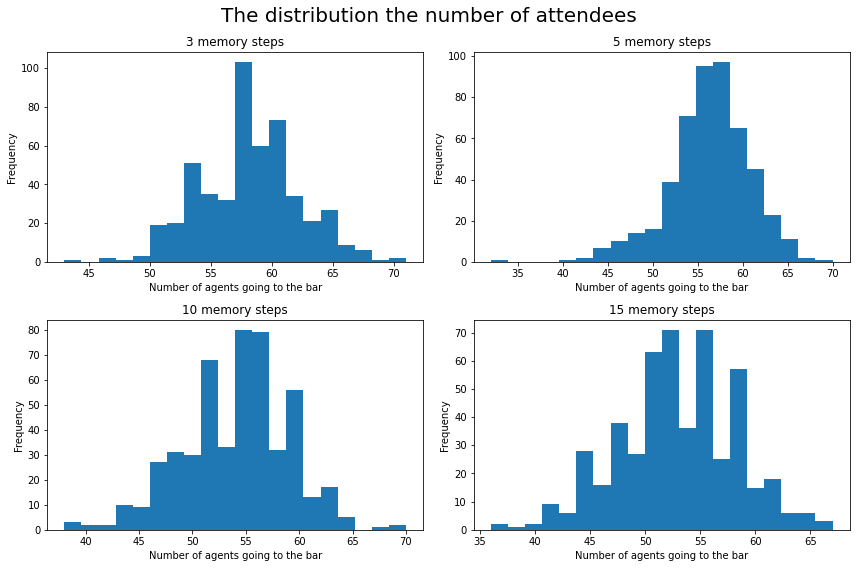

In [35]:
# plot number of people in bar density
plt.figure(figsize=(12,8))
plt.suptitle("The distribution the number of attendees", size=20)
for i in range(len(m_list)):
    plt.subplot(221+i)
    plt.hist(num_bar_02[i],bins=20)
    plt.title(f"{m_list[i]} memory steps")
    plt.xlabel("Number of agents going to the bar")
    plt.ylabel("Frequency")
plt.tight_layout()

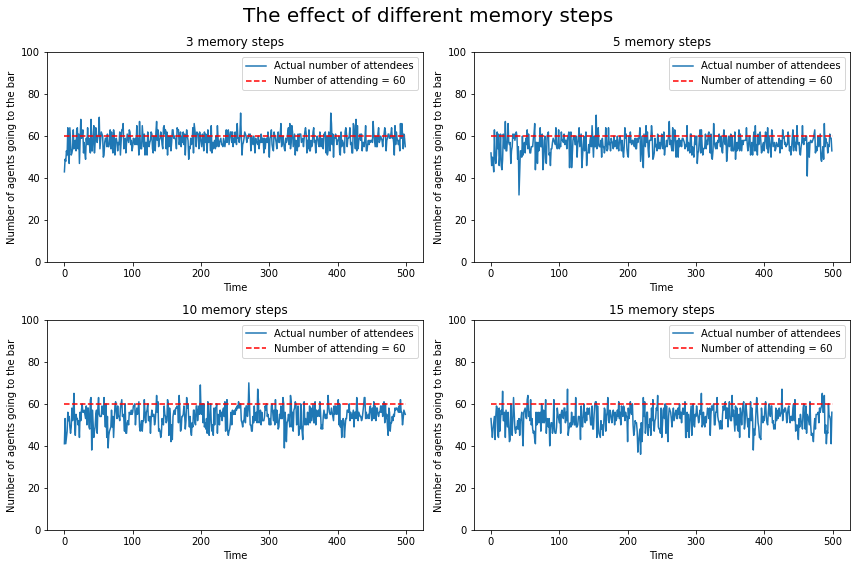

In [22]:
# plot number of people in bar vs time
plt.figure(figsize=(12,8))
plt.suptitle("The effect of different memory steps", size=20)
for i in range(len(m_list)):
    plt.subplot(221+i)
    plt.plot(num_bar_02[i], label="Actual number of attendees")
    plt.title(f"{m_list[i]} memory steps")
    plt.plot([0, iter_num], [60, 60], "r--", label="Number of attending = 60")
    plt.legend()
    plt.ylim([0, 100])
    plt.xlabel("Time")
    plt.ylabel("Number of agents going to the bar")
plt.tight_layout()
plt.show()

## Once exceed 60, uncomfortable

### Effect on number of strategies

In [23]:
# simulations for 1
num_bar_11 = []
for s in s_list:
    cur_game = BarGame(s=s, cal_benefit=1)
    cur_game.runGame()
    num_bar = cur_game.getNumberofPeopleInBar()
    num_bar_11.append(num_bar)

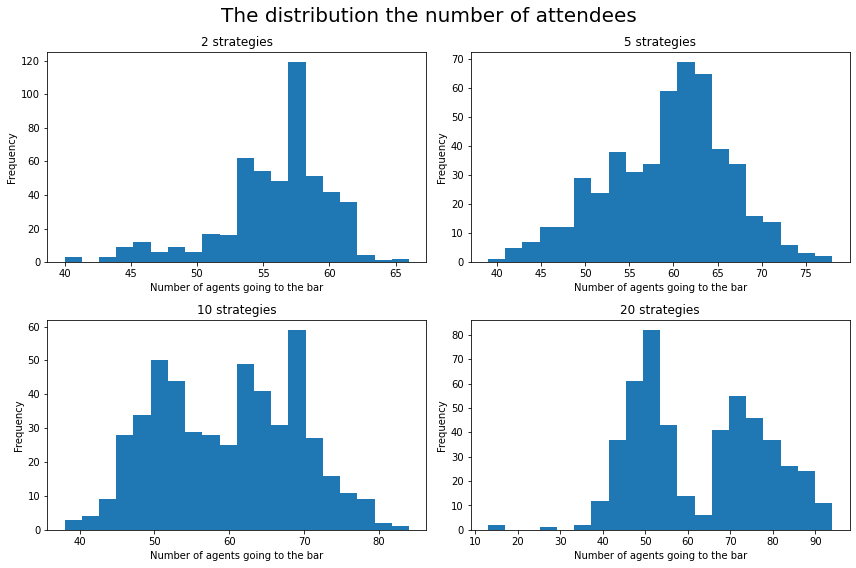

In [33]:
# plot number of people in bar density
plt.figure(figsize=(12,8))
plt.suptitle("The distribution the number of attendees", size=20)
for i in range(len(s_list)):
    plt.subplot(221+i)
    plt.hist(num_bar_11[i],bins=20)
    plt.title(f"{s_list[i]} strategies")
    plt.xlabel("Number of agents going to the bar")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

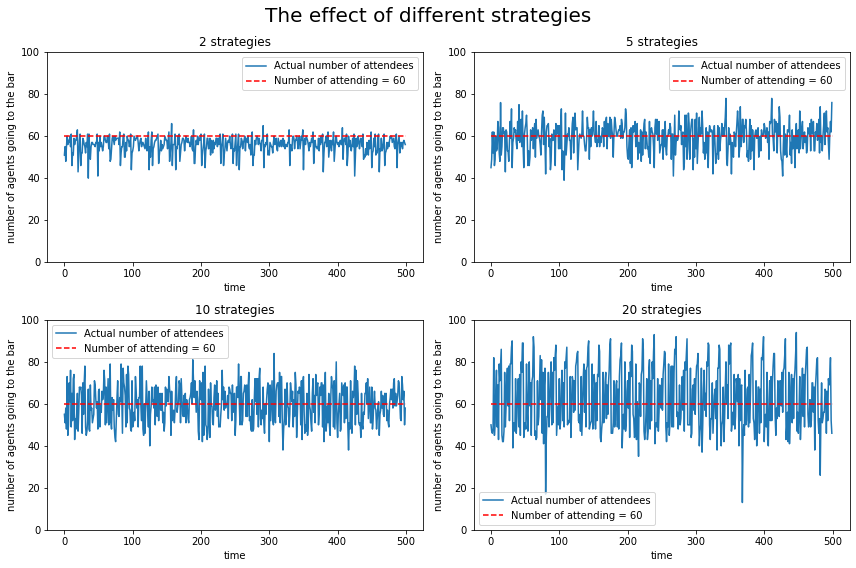

In [25]:
# plot number of people in bar vs time
plt.figure(figsize=(12,8))
plt.suptitle("The effect of different strategies", size=20)
for i in range(len(s_list)):
    plt.subplot(221+i)
    plt.plot(num_bar_11[i], label="Actual number of attendees")
    plt.title(f"{s_list[i]} strategies")
    plt.plot([0, iter_num], [60, 60], "r--", label="Number of attending = 60")
    plt.legend()
    plt.ylim([0, 100])
    plt.xlabel("time")
    plt.ylabel("number of agents going to the bar")
plt.tight_layout()
plt.show()

### Effect on memory steps

In [26]:
# simulations for 0
num_bar_12 = []
for m in m_list:
    cur_game = BarGame(m=m, cal_benefit=0)
    cur_game.runGame()
    num_bar = cur_game.getNumberofPeopleInBar()
    num_bar_12.append(num_bar)

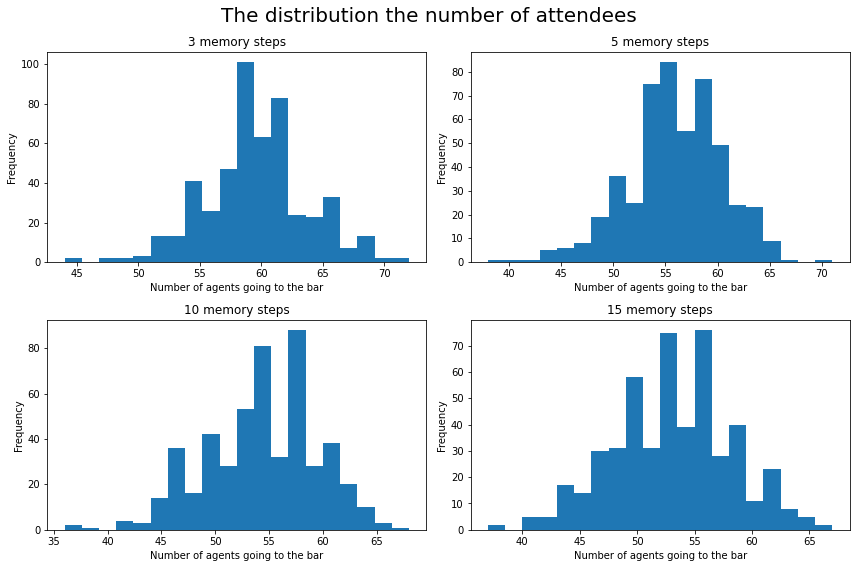

In [34]:
# plot number of people in bar density
plt.figure(figsize=(12,8))
plt.suptitle("The distribution the number of attendees", size=20)
for i in range(len(m_list)):
    plt.subplot(221+i)
    plt.hist(num_bar_12[i],bins=20)
    plt.title(f"{m_list[i]} memory steps")
    plt.xlabel("Number of agents going to the bar")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

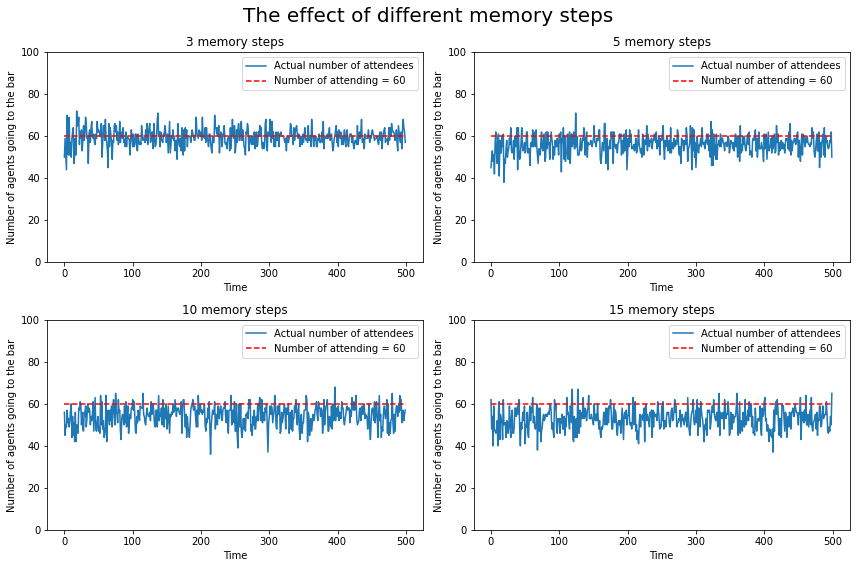

In [28]:
# plot number of people in bar vs time
plt.figure(figsize=(12,8))
plt.suptitle("The effect of different memory steps", size=20)
for i in range(len(m_list)):
    plt.subplot(221+i)
    plt.plot(num_bar_12[i], label="Actual number of attendees")
    plt.title(f"{m_list[i]} memory steps")
    plt.plot([0, iter_num], [60, 60], "r--", label="Number of attending = 60")
    plt.legend()
    plt.ylim([0, 100])
    plt.xlabel("Time")
    plt.ylabel("Number of agents going to the bar")
plt.tight_layout()
plt.show()

In [29]:
# Probability based model
import numpy as np
import random as rd
import matplotlib.pyplot as plt
class ProbBarGame:
    def __init__(self, iter_num=500, N=100, pi=0.2, ro=0.1):
        self.iter_num = iter_num
        self.N = N
        self.percent = 0.6
        self.B = int(self.percent * self.N)
        self.p = np.zeros(N) + 0.2
        self.ur = 1
        self.us = 1.5
        self.uf = self.us-1
        self.pi = pi
        self.ro = ro
        self.num_go_bar = []
        self.r_score = np.zeros(N)
    
    def runGame(self):
        for i in range(self.iter_num):
            num_going = 0
            decision = []
            for ag in range(self.N):
                cur_decision = self.makeDecision(self.p[ag])
                decision.append(cur_decision)
                if cur_decision == 1:
                    num_going += 1
            self.num_go_bar.append(num_going)
            for ag in range(self.N):
                di = self.cal_U(decision[ag], num_going) - self.ur
                self.r_score[ag] += di
                self.p[ag] += self.cal_h(decision[ag], di, self.p[ag])

    
    def cal_U(self, a, num_going):
        uf=self.uf;us=self.us
        if a == 0:
            return 1
        elif num_going>self.B:
            return uf
        else:
            return us
            
    def cal_h(self, a, d, p):
        if a == 1:
            if d>=0 and p>=1-self.pi:
                return (self.ro*d*(1-p))/self.pi
            elif d<=0 and p<=self.pi:
                return (self.ro*d*p)/self.pi
            else:
                return self.ro*d
        else:
            if d<=0 and p>=1-self.pi:
                return -(self.ro*d*(1-p))/self.pi
            elif d>=0 and p<=self.pi:
                return -(self.ro*d*p)/self.pi
            else:
                return -self.ro*d            
            
    def makeDecision(self, p):
        if rd.random() < p:
            return 1
        else:
            return 0
    
    def getNumberofPeopleInBar(self):
        return np.array(self.num_go_bar)
    

In [30]:
test_rl = ProbBarGame(N=100,iter_num=10000,pi=0.2, ro=0.1)
test_rl.runGame()

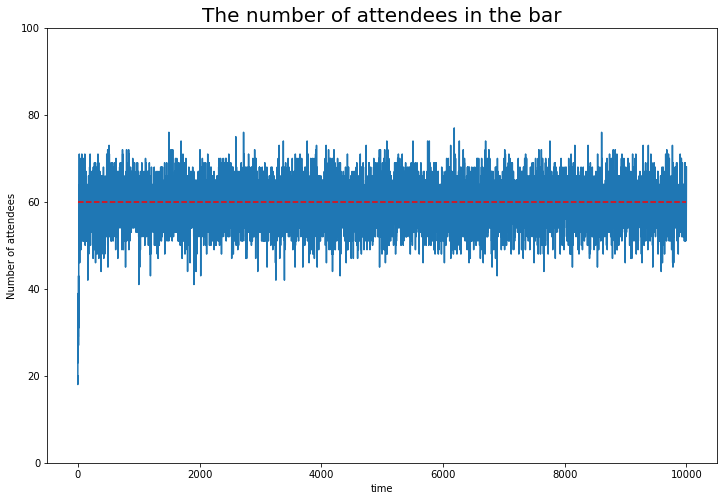

In [31]:
tmp_arr = test_rl.getNumberofPeopleInBar()
plt.figure(figsize=(12, 8))
plt.title("The number of attendees in the bar",size=20)
plt.plot(tmp_arr, label="Actual number of attendees")
plt.plot([0, test_rl.iter_num], [60, 60], "r--", label="Number of attendees = 60")
plt.xlabel("time")
plt.ylabel("Number of attendees")
plt.ylim([0, test_rl.N])
plt.show()

(array([ 2.,  4.,  4., 10., 16., 23., 12.,  8., 13.,  8.]),
 array([  2.5,  33.2,  63.9,  94.6, 125.3, 156. , 186.7, 217.4, 248.1,
        278.8, 309.5]),
 <BarContainer object of 10 artists>)

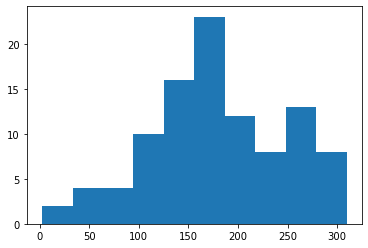

In [32]:
plt.hist(test_rl.r_score)